# Pymaceuticals Inc
## Analysis
* Observed trend 1
* Observed trend 2
* Observed trend 3

In [1]:
from os import path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import sem
from generatoratron import axis_gen, errorbar_gen

In [2]:
csv_path1 = path.join('..','raw_data','clinicaltrial_data.csv')
csv_path2 = path.join('..','raw_data','mouse_drug_data.csv')

In [3]:
clinical_df = pd.read_csv(csv_path1)
mouse_df =    pd.read_csv(csv_path2)

In [4]:
clinical_mouse_df = clinical_df.merge(mouse_df, how='outer', on='Mouse ID')
clinical_mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [5]:
tumor_response_gp_mn = clinical_mouse_df.groupby(by=['Drug',
                                            'Timepoint']).mean()[['Tumor Volume (mm3)']]
tumor_response_gp_mn.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [6]:
tumor_response_pv_mn = pd.pivot_table(clinical_mouse_df,values='Tumor Volume (mm3)',
                                index=['Timepoint'], columns=['Drug'], aggfunc=np.mean)
tumor_response_pv_mn.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [7]:
tumor_response_gp_se = clinical_mouse_df.groupby(by=['Drug',
                                            'Timepoint']).sem()[['Tumor Volume (mm3)']]
tumor_response_gp_se.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [8]:
tumor_response_pv_se = pd.pivot_table(clinical_mouse_df,values='Tumor Volume (mm3)',
                                index=['Timepoint'], columns=['Drug'], aggfunc=sem)
tumor_response_pv_se.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


In [9]:
x_axis = list(tumor_response_pv_mn.index)
y_axis = axis_gen(tumor_response_pv_mn)
sem_axis = axis_gen(tumor_response_pv_se)

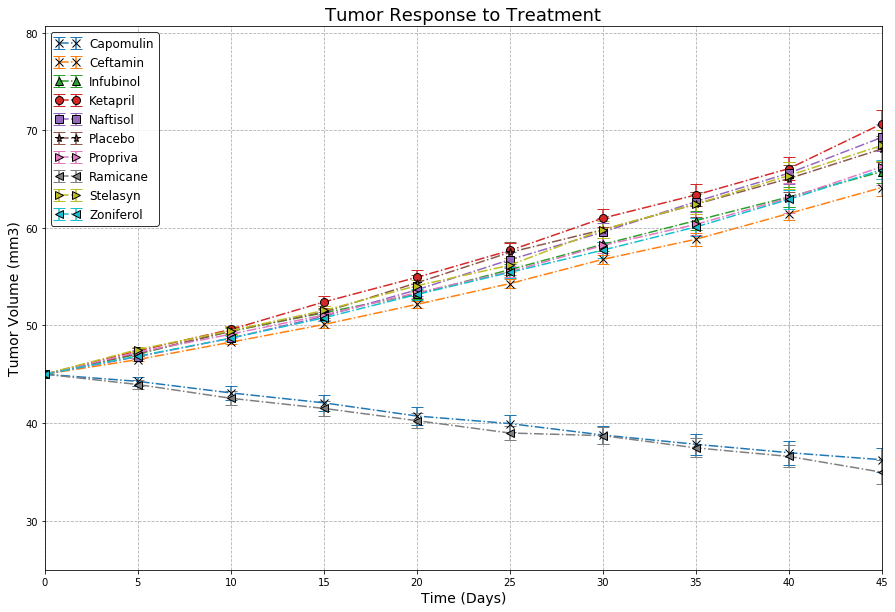

In [10]:
plt.figure(figsize=(15,10))
plt.ylim(tumor_response_pv_mn.values.min() - 10,tumor_response_pv_mn.values.max() + 10)
plt.xlim(0,max(x_axis))

# function call to generate plots
errorbar_gen(y_axis, sem_axis, tumor_response_pv_mn, x_axis, sem_axis)

plt.title('Tumor Response to Treatment', size=18)
plt.xlabel('Time (Days)', size=14)
plt.ylabel('Tumor Volume (mm3)', size=14)
plt.legend(fontsize=12, edgecolor='black', loc=2, fancybox=True, numpoints=2)
plt.grid(ls='dashed')
plt.show()

## Metastatic Response to Treatment

In [11]:
metastatic_response_gp_mn = clinical_mouse_df.groupby(by=['Drug',
                                            'Timepoint']).mean()[['Metastatic Sites']]
metastatic_response_gp_mn.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [12]:
metastatic_response_pv_mn = pd.pivot_table(clinical_mouse_df,values='Metastatic Sites',
                                index=['Timepoint'], columns=['Drug'], aggfunc=np.mean)
metastatic_response_pv_mn.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [13]:
metastatic_response_gp_se = clinical_mouse_df.groupby(by=['Drug',
                                            'Timepoint']).sem()[['Metastatic Sites']]
metastatic_response_gp_se.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [14]:
metastatic_response_pv_se = pd.pivot_table(clinical_mouse_df,values='Metastatic Sites',
                                index=['Timepoint'], columns=['Drug'], aggfunc=sem)
metastatic_response_pv_se.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


In [15]:
x_axis = list(metastatic_response_pv_mn.index)
y_axis = axis_gen(metastatic_response_pv_mn)
sem_axis = axis_gen(metastatic_response_pv_se)

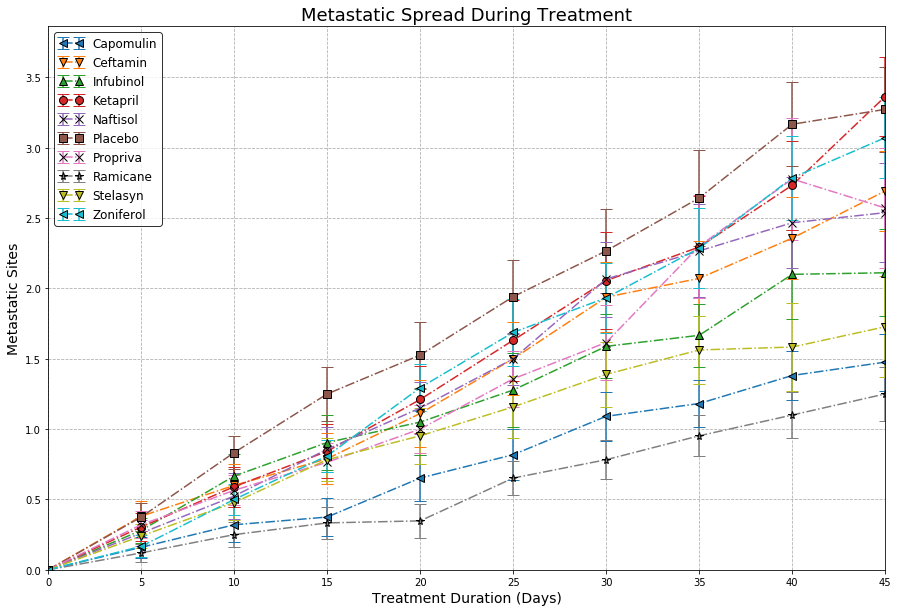

In [16]:
plt.figure(figsize=(15,10))
plt.ylim(metastatic_response_pv_mn.values.min(),metastatic_response_pv_mn.values.max() + .5)
plt.xlim(0,max(x_axis))

# function call to generate plots
errorbar_gen(y_axis, sem_axis, metastatic_response_pv_mn, x_axis, sem_axis)

plt.title('Metastatic Spread During Treatment', size=18)
plt.xlabel('Treatment Duration (Days)', size=14)
plt.ylabel('Metastatic Sites', size=14)
plt.legend(fontsize=12, edgecolor='black', loc=2, fancybox=True, numpoints=2)
plt.grid(ls='dashed')
plt.show()

## Survival Rates

In [17]:
survival_rate_gp_ct = clinical_mouse_df.groupby(by=['Drug',
                                            'Timepoint']).count()[['Mouse ID']].rename(columns={'Mouse ID': 'Mouse Count'})
survival_rate_gp_ct.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [18]:
survival_rate_pv_ct = pd.pivot_table(clinical_mouse_df,values='Mouse ID',
                                index=['Timepoint'], columns=['Drug'], aggfunc=np.ma.count)
survival_rate_pv_ct.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [19]:
x_axis = list(survival_rate_pv_ct.index)
y_axis = [list(survival_rate_pv_ct[element].divide(survival_rate_pv_ct[element].max()).multiply(100))
           for element in survival_rate_pv_ct.columns]
sem_axis = np.linspace(0,0,100, dtype=int).reshape(10,10)


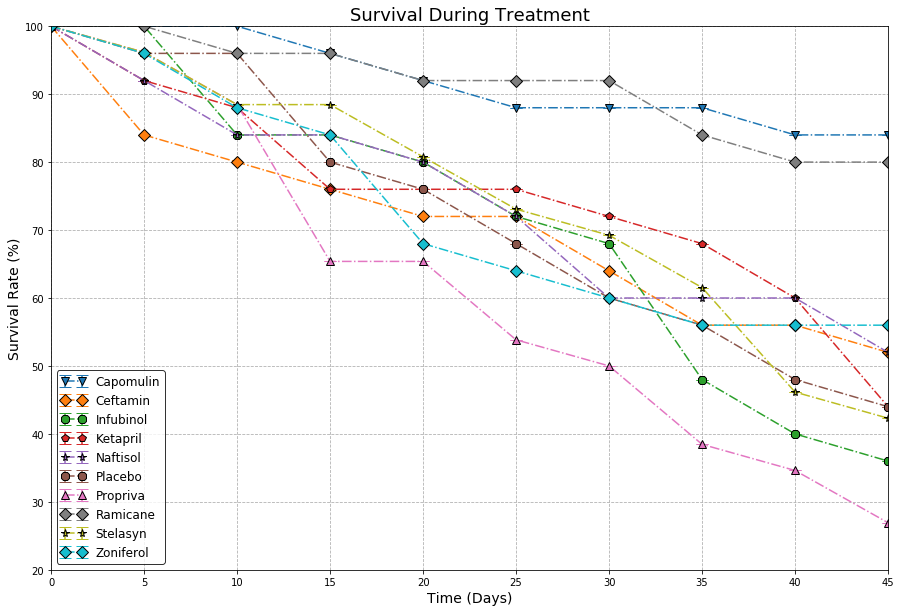

In [20]:
plt.figure(figsize=(15,10))
plt.ylim(20,100)
plt.xlim(0,max(x_axis))

# function call to generate plots
errorbar_gen(y_axis, sem_axis, survival_rate_pv_ct, x_axis, sem_axis)

plt.title('Survival During Treatment', size=18)
plt.xlabel('Time (Days)', size=14)
plt.ylabel('Survival Rate (%)', size=14)
plt.legend(fontsize=12, edgecolor='black', loc=3, fancybox=True, numpoints=2)
plt.grid(ls='dashed')
plt.show()

## Summary Bar Graph

In [21]:
tumor_change_over_treatment = ((tumor_response_pv_mn.iloc[-1] - tumor_response_pv_mn.iloc[0])
                               /tumor_response_pv_mn.iloc[0])*100
tumor_change_over_treatment

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [22]:
x_axis = np.arange(0,len(tumor_response_pv_mn),1)
y_axis = np.array(list(tumor_change_over_treatment))

mask_good = y_axis < 0
mask_bad = y_axis >= 0

labels = list(tumor_response_pv_mn.columns)

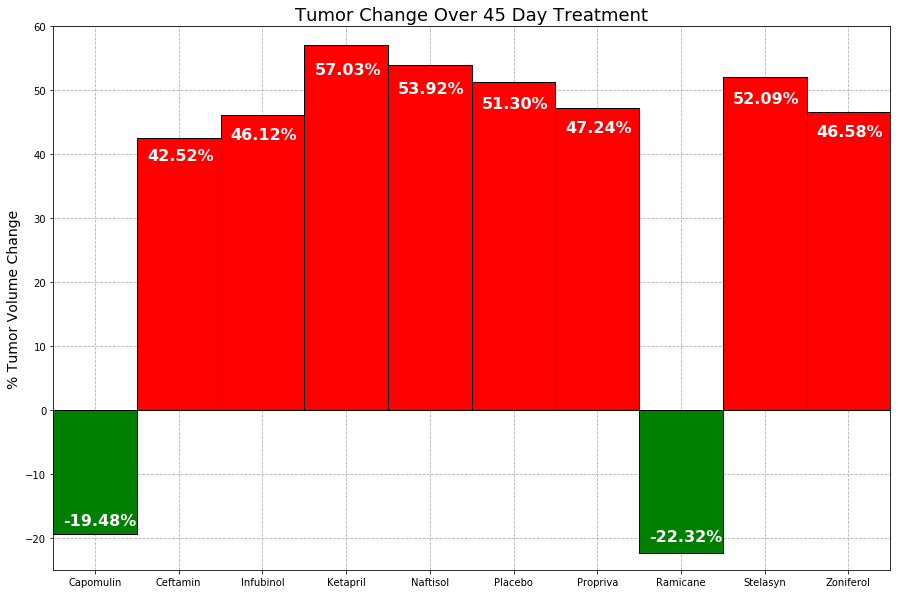

In [23]:
fig, ax = plt.subplots(figsize=(15,10))

ax.bar(x_axis[mask_good], y_axis[mask_good], width=1, edgecolor=['black']*len(x_axis[mask_good]), color='green', zorder=3)
ax.bar(x_axis[mask_bad], y_axis[mask_bad], width=1, edgecolor=['black']*len(x_axis[mask_bad]), color='red', zorder=3)
ax.set_xticks(list(x_axis))
ax.set_xticklabels(labels=labels)


ax.set_title('Tumor Change Over 45 Day Treatment', fontdict={'fontsize':18})
ax.set_ylabel('% Tumor Volume Change', fontdict={'fontsize':14})

for bar in ax.patches:
    ax.text(bar.get_x()+.12, bar.get_height()*.92, "{:.2f}%".format(bar.get_height()),
            color='white', fontdict={'size':16, 'weight':'heavy'})
    
ax.set_ylim(-25,60)
ax.set_xlim(-.5,9.5)
ax.grid(ls='dashed', zorder=0)

plt.show()